# Bonds

Bonds are financial instruments that have two types of cashflows. The first type is coupon payments which are periodic payments where as the second type is the principal payment at the end of the bond. The principal payment is a large payout where as the coupon payments are much smaller but frequent payments. The principal is also called the face value. Let's begin with seeing what this looks like on a timeline. Let's say we have a bond with a \\$1000 face value which also pays a 2% coupon (equal to \\$20) every year over 5 years. Then we receive \\$20 in all years except the last one where we get that coupon plus the face value of \\$1000.

In [1]:
#Face value
FV = 1000

#Coupon Rate
cr = .02

#Coupon payment
coupon = FV*cr

#Periods
periods = 5

#We get one payment every year
payments = [coupon]*periods

#Last period we also get the face value
payments[-1]+=FV
print(payments)

[20.0, 20.0, 20.0, 20.0, 1020.0]


Now if our discount rate is 5% we can also find what the present value is going to be as we did before.

In [2]:
time = list(range(1,6))

#Get the present value for each year
PV = [x/(1.05)**t for x,t in zip(payments,time)]
print(PV)

#Find the sum over the years
PV = sum(PV)
print(PV)

[19.047619047619047, 18.140589569160998, 17.27675197062952, 16.454049495837637, 799.196689797828]
870.1156998810752


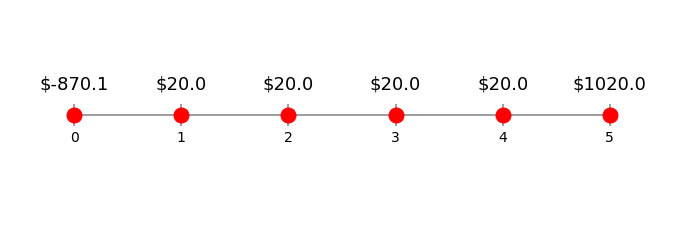

In [3]:
#Bringing back our timeline function
import matplotlib.pyplot as plt
def timelinePlot(periods,values):
#Create our plot
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax, color='grey')

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5, color='grey')
        
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
        
    #Get rid of axes
    plt.axis('off')
    
    for value in values:
        #Plot a red dot on the year that our value is at
        plt.plot(positions[value[1]],y, 'ro', ms = 15, mfc = 'r')
        #Plot the values above, use rounding to keep it clean
        plt.text(positions[value[1]], y+1.2, "$"+str(round(value[0],1)), horizontalalignment='center',fontsize=18)

    
    plt.show()

#Plot the data
data = [(-PV,0)]
for x,t in zip(payments,time):
    data.append((x,t))

timelinePlot(5,data)

At first, it may seem like it does not make sense that this bond can have this present value and rate of return given the coupon payments. For example, the $20 payment divided by the present value of the bond equals just 2.3%.

In [4]:
#The coupon divided by the present value equals 2.3%
print(20/PV)

0.02298544894975868


Where does the rest of the return come from if the one year return would just be 2.3% from the coupon? The answer is that the bond is also worth more now because the future coupons are discounted less, but more importantly the much larger face value payment is even less discounted. What is the bond going to be worth in a year, let's calculate it after visualizing the structure again.

In [5]:
#Now one coupon has been paid out and we have moved forward one year
payments = payments[1:]
print(payments)

[20.0, 20.0, 20.0, 1020.0]


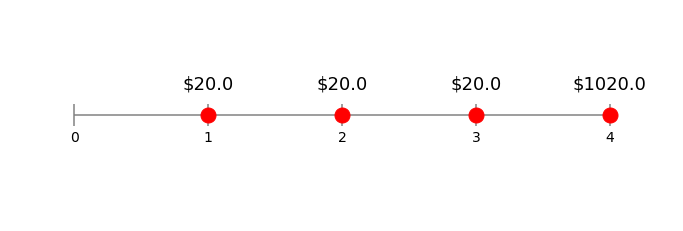

In [6]:
#Plot the cashflows
time = list(range(1,5))
data = []
for x,t in zip(payments,time):
    data.append((x,t))

timelinePlot(4,data)

Calculate the value of the bond now.

In [7]:
time = list(range(1,6))
#Now let's say we still have r=5%, what is our present value of the bond?
PV = sum([x/(1.05)**t for x,t in zip(payments,time)])
print(PV)

893.621484875129


Now if we add the price appreciation of the bond plus the coupon we see that what we get back is 5%.

In [8]:
PV0 = 870.1156998810752
PV1 = 893.621484875129
c = 20
print((PV1-PV0+c)/PV0)

0.050000000000000024


## Components of Bond Return

Now we can say that there are two components of the bond return. We are actually paid out a coupon payment, but besides that the present value of the bond appreciates (in future cases we will see that it may depreciate as well though). We do not actually get those payments, but if the rate stays the same we could hypothetically sell it for more than we bought it at that point to get the rest of our return.

## Bond Equation

Bonds also have a simple equation to represent them which is just an annuity formula plus the present value of the face value.

$$ PV = F \cdot c \cdot \frac{1-(1+r)^n}{r} + \frac{F}{(1+r)^n}$$

where

$ PV = \text{Present Value} $

$ F = \text{Face Value} $

$ c = \text{Coupon Rate} $

$ r = \text{Discount Rate} $

$ n = \text{Number of Periods} $

In [9]:
#Convert this to some formulas

#Use our annuity formula from before
def annuityTVM(P, n, r):
    annuityFactor = (1-(1+r)**-n)/r
    annuity = annuityFactor*P
    return annuity

def bond_value(F, c, n, r):
    #Payment is equal to the coupon rate times the FV
    P = F*c
    
    #Find the annuity present value
    annuity_PV = annuityTVM(P,n,r)
    
    #Find the face value present value
    face_value_PV = (F)/(1+r)**n
    
    #Return the sum
    return annuity_PV + face_value_PV

In [10]:
#Same value as before
print(bond_value(1000, .02, 5, .05))

870.1156998810752


## Par Bonds

A bond which is at par value is one which has a present value equal to its face value. This happens when the coupon matches the discount rate. Let's see some examples of this below.

In [11]:
print(bond_value(1000, .05, 5, .05))
print(bond_value(1000, .07, 5, .07))
print(bond_value(1000, .07, 10, .07))
print(bond_value(5000, .05, 5, .05))
print(bond_value(5000, .1, 10, .1))

999.9999999999999
1000.0
1000.0
5000.0
5000.0


## Discount Bonds and Pull to Par

When a bond has a coupon rate less than the discount rate, it will result in a present value less than the face value. This is a discount bond because you buy it at a discount! As time passes it will approach par value and appreciate in value. This is pulling to par. Let's see an example with a ten year bond with face value of $1000, coupon rate of 2%, and discount rate of 5%

In [12]:
#Define parameters
n = 10
F = 1000
c = .02
r = .05

We want to track the what time period we are at, and we will also find the number of years left. Then we can find the values in all of these cases and finally graph it.

In [13]:
time = list(range(n))
time_left = [n-x for x in time]

print("Year:")
print(time)
print("Years left:")
print(time_left)

Year:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Years left:
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [14]:
#Find the bond values
vals = [bond_value(F, c, t, r) for t in time_left]
print("Bond values:")
print(vals)

Bond values:
[768.3479521244554, 786.7653497306782, 806.1036172172122, 826.4087980780728, 847.7292379819763, 870.1156998810752, 893.6214848751291, 918.3025591188856, 944.21768707483, 971.4285714285713]


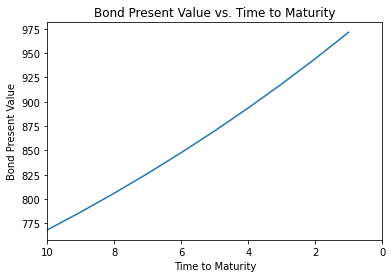

In [15]:
plt.plot(time_left, vals)
plt.xlim([10,0])
plt.xlabel("Time to Maturity")
plt.ylabel("Bond Present Value")
plt.title("Bond Present Value vs. Time to Maturity")
plt.show()

## Premium Bonds

Premium bonds act in the opposite way. Their coupon payments are greater than the discount rate so they pull to par but do so from a premium over the par value in the beginning. 

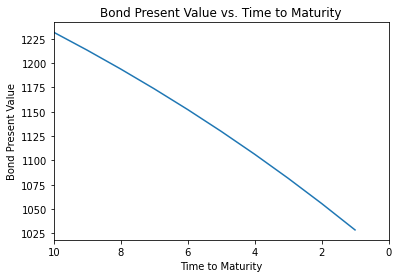

In [16]:
#Define parameters
n = 10
F = 1000
c = .08
r = .05

vals = [bond_value(F, c, t, r) for t in time_left]
plt.plot(time_left, vals)
plt.xlim([10,0])
plt.xlabel("Time to Maturity")
plt.ylabel("Bond Present Value")
plt.title("Bond Present Value vs. Time to Maturity")
plt.show()

## Comparing the Discount, Par, and Premium Bonds

We can see that in all three cases, the values are going to approach par as the time to maturity gets smaller and smaller.

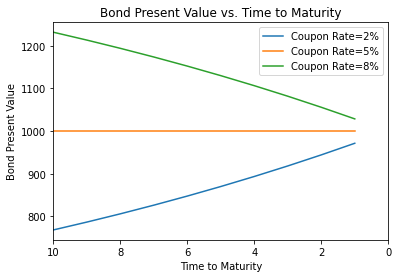

In [17]:
#Get the different values
vals1 = [bond_value(F, .02, t, r) for t in time_left]
vals2 = [bond_value(F, .05, t, r) for t in time_left]
vals3 = [bond_value(F, .08, t, r) for t in time_left]

#Plot the values
plt.plot(time_left, vals1)
plt.plot(time_left, vals2)
plt.plot(time_left, vals3)
plt.xlim([10,0])
plt.xlabel("Time to Maturity")
plt.ylabel("Bond Present Value")
plt.title("Bond Present Value vs. Time to Maturity")
plt.legend(["Coupon Rate=2%",
           "Coupon Rate=5%",
           "Coupon Rate=8%"])

plt.show()

## Solving for the Coupon Rate

There are some cases where what we are solving for is not actually the present value but instead some other component, like, for example the coupon rate. We can re-arrange the equation to do this. Start with the equation from before.

$$ PV = F \cdot c \cdot \frac{1-(1+r)^n}{r} + \frac{F}{(1+r)^n}$$

where

$ PV = \text{Present Value} $

$ F = \text{Face Value} $

$ c = \text{Coupon Rate} $

$ r = \text{Discount Rate} $

$ n = \text{Number of Periods} $

Subtract the face value part of the equation.

$$ PV - \frac{F}{(1+r)^n} = F \cdot c \cdot \frac{1-(1+r)^n}{r}$$

Now, on the right side there is the coupon rate times the face value and the annuity factor. Dividing by this we can compute the coupon rate.

$$c = \frac{PV - \frac{F}{(1+r)^n}}{F \cdot \frac{1-(1+r)^n}{r}}$$

Let's do an example with the parameters below.

In [18]:
#We can also use the equation to find the coupon rate that corresponds to a certain PV, FV, n and r
PV = 926.399129485853
F = 1000
n = 10
r = .06

In [19]:
#to find the coupon rate, first we need to figure out what the annuity part of the bond is worth
face_value_PV = F/(1+r)**n
print(face_value_PV)

558.3947769151179


In [20]:
#So let's take out that from the PV
annuity_PV = PV - face_value_PV
print(annuity_PV)

368.00435257073514


So we know that the annuity is worth $368. We also can find the annuity factor since we have r and n

In [21]:
annuity_factor = (1-(1.06)**-n)/r
print(annuity_factor)

7.360087051414703


So we know that the payment times the annuity factor is what an annuity's present value equals, so....

In [22]:
coupon = annuity_PV/annuity_factor
print(coupon)

50.0


In [23]:
#Coupon rate is coupon/face value
print(coupon/F)

0.05


## Finding r

To find r we are going to have a much tougher time since there is no easy equation solution. To solve it we need to experiment. Let's set the parameters below and try out different values of r and see if it will get us to match the values. In this lesson we are going to just try a couple values, but there are more advanced methods that you can use that we won't introduce here. I made the example easy to work out by guessing very 1% within a limited range.

In [24]:
#Set up the parameters
PV = 768.3479521244554
F = 1000
c = .02
n = 10

We can predict the present value for something like say 2% and see what the difference between the actual and predicted is.

In [25]:
#Let's try to see what our PV would be if r=2%
predicted = bond_value(F,c,n,.02)
print(predicted)

1000.0


If we check the difference we see it is not very close.

In [26]:
print(predicted-PV)

231.65204787554455


What we could do is test different rates and see which one gets us closest to the PV we are given

In [27]:
rates = [x/100 for x in range(1,13)]
print(rates)
print()
values = [bond_value(F,c,n,x) for x in rates]
print(values)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12]

[1094.7130453070167, 1000.0, 914.6979716322417, 837.7820844128994, 768.3479521244554, 705.596517943412, 648.8209229533697, 597.3951160635131, 550.7639609188691, 508.4346315436251, 469.9691189972911, 434.97769715891326]


If we look for the absolute value in the difference between present value and predicted, this will help us find the closest fit.

In [28]:
#Differences
diff = [abs(x-PV) for x in values]
print(diff)

[326.3650931825613, 231.65204787554455, 146.35001950778621, 69.43413228844395, 0.0, 62.751434181043464, 119.5270291710857, 170.95283606094233, 217.58399120558636, 259.9133205808304, 298.37883312716434, 333.3702549655422]


In [29]:
#Find the the minimum error
print(min(diff))

0.0


In [30]:
#Get the index of it
i = diff.index(min(diff))
print(i)

4


In [31]:
#And find the rate that got us there
print(rates[i])

0.05


After doing this, we see that we have the correct rate r to get the present value we saw before!

In [32]:
print(PV)
print(bond_value(FV,cr,n,rates[i]))

768.3479521244554
768.3479521244554
